In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm 




In [4]:
#Abrir el archivo
df = pd.read_csv("../heights.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1050 non-null   object 
 1   height  1050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.5+ KB


In [5]:
#media promedi de estatura de las personas evaluadas
df["height"].mean()

np.float64(68.32301331818972)

In [6]:
df["height"]

0       75.000000
1       70.000000
2       68.000000
3       74.000000
4       61.000000
          ...    
1045    69.000000
1046    69.000000
1047    63.385827
1048    66.000000
1049    66.000000
Name: height, Length: 1050, dtype: float64

In [7]:
#ordenar datos para observar el valor mínimo y el valor máximo
df["height"].sort_values(ascending=True) #por default es True

1044    50.000000
1031    50.000000
193     51.000000
980     52.000000
981     52.000000
          ...    
376     79.050000
280     80.000000
252     80.000000
992     81.000000
1016    82.677165
Name: height, Length: 1050, dtype: float64

In [8]:
#mediana
my_list= [7, 3, 4, 4, 5, 6, 3, 4]
my_list.sort()

In [9]:
my_list

[3, 3, 4, 4, 4, 5, 6, 7]

In [10]:
df["height"].median() #si corto a la mitad la lista ordenada de estaturas es el valor de en medio

np.float64(68.5)

In [11]:
#Rango es la diferencia del valor mayor y el valor menor de los datos numéricos de análisis
df["height"].max()


np.float64(82.67716535433071)

In [12]:
df["height"].min()

np.float64(50.0)

In [13]:
#rango resta del máximo menos el mínimo
df["height"].max() - df["height"].min()

np.float64(32.67716535433071)

In [14]:
#cuartiles
my_list= [7, 3, 4, 4, 5, 6, 3, 4]
my_list.sort()
my_list

[3, 3, 4, 4, 4, 5, 6, 7]

In [15]:
df["height"].quantile([0.25, 0.5, 0.75])

0.25    66.0
0.50    68.5
0.75    71.0
Name: height, dtype: float64

In [16]:
#cuánto en promedio se desvían los datos del centro Desviación Estándar
df["height"].std(ddof=1) 

np.float64(4.078616969642447)

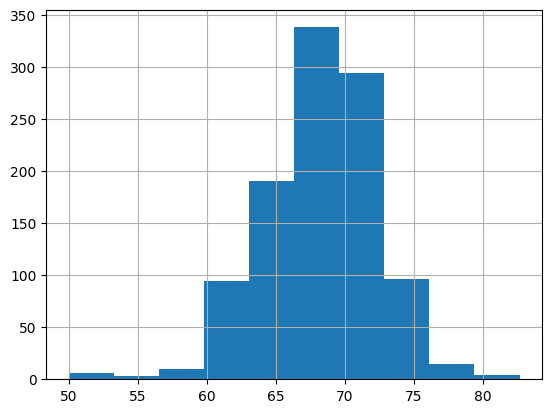

In [17]:
df["height"].hist()
plt.show()

In [18]:
#Rango intercuartílico es la diferencia del cuartil 3 menos el cuartil 1
df["height"].quantile(.75) - df["height"].quantile(.25)

np.float64(5.0)

In [19]:
df.sample(10)

,sex,height
193,Female,51.000000
775,Male,71.000000
701,Male,68.503937
1027,Male,74.000000
693,Male,71.000000
865,Male,70.000000
722,Female,62.400000
736,Male,68.503937
690,Male,75.980000
4,Male,61.000000


In [20]:
df[df["sex"]== "Male"]["height"].mean()

np.float64(69.31475494143555)

In [21]:
df[df["sex"]== "Male"]["height"].describe()

count    812.000000
mean      69.314755
std        3.611024
min       50.000000
25%       67.000000
50%       69.000000
75%       72.000000
max       82.677165
Name: height, dtype: float64

<Axes: >

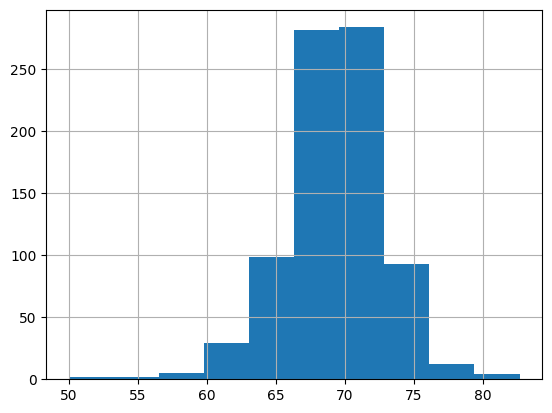

In [22]:
df[df["sex"]== "Male"]["height"].hist()

<Axes: >

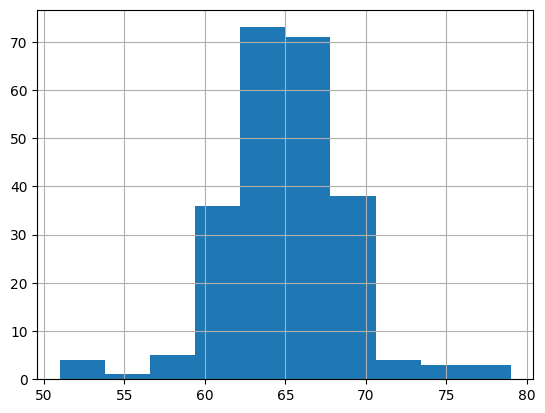

In [23]:
df[df["sex"]== "Female"]["height"].hist()

<Axes: title={'center': 'height'}, xlabel='[sex]'>

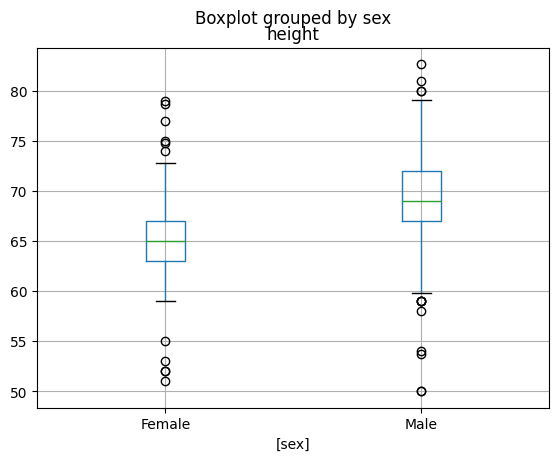

In [27]:
df.boxplot(by="sex")

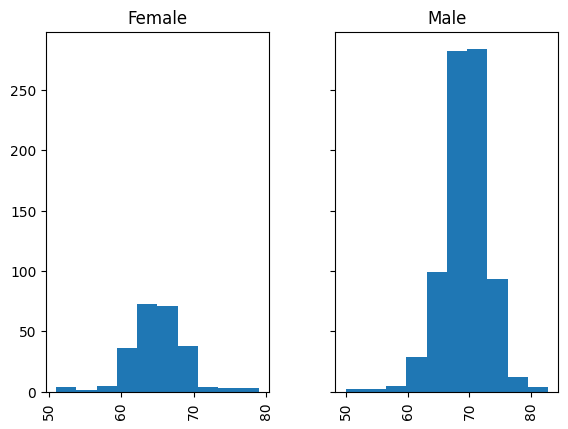

In [29]:
df.hist(by="sex",sharey=True)
plt.show()

In [ ]:
#La distribución Bernoulli es la más básica porque corresponde a la probabilidad de que un evento se de o no se de
#por ejemplo el lanzamiento de una moneda de sacar cara 0.5 y de no sacar cara 0.5
#El valor esperado de un evento Bernoulli con probabilidad de éxito p y de no éxito q (1-p) es p
#La varianza, desviación estándar al cuadrado, es p*q 
# Para que sala José Rosales p= 1/12 por lo tanto q = 11/12 
# La varianza es p * q = 1/12 * 11/12 = 11/144
#Para un algoritmo de Machine Learning tendremos estos eventos 

#Distribución binomial es una secuencia de eventos Bernoulli, por ejemplo la probablilidad de sacar dos caras
#El valor esperado de un evento binomial es n*p n es la cantidad de eventos
#La varianza es n*p*q 

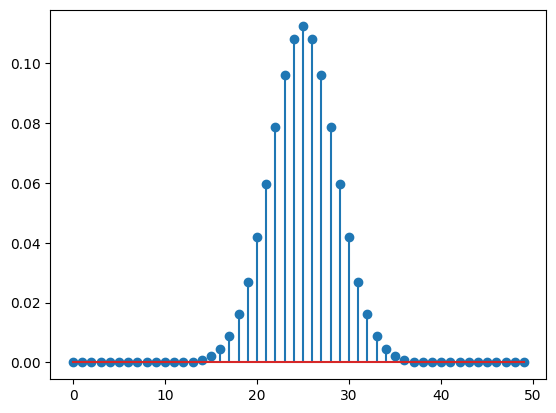

In [31]:
n_experiments = 50 
probability = 0.5
data = range(n_experiments)
pmf = binom.pmf(data, n_experiments, probability)
plt.figure()
plt.stem(data,pmf)
plt.show()

In [ ]:
#La distribución Poisson es para eventos que funcionen con conteos y se aplica dentro de un intervalo de tiempo definido
#Esta distribución representa el número de eventos que ocurra en un intervalo fijo
#La esperanza y la varianza son iguales y se representan por el valor lambda

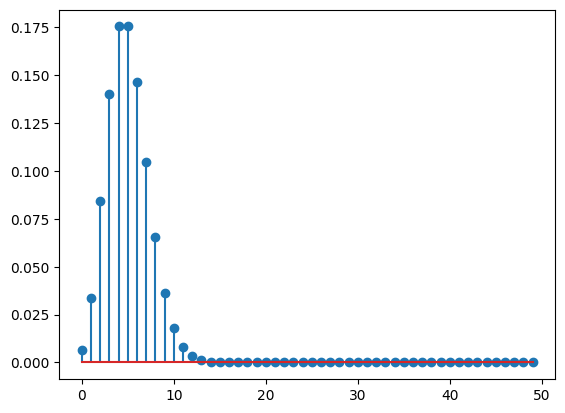

In [32]:
n_experiments = 10
n_ocurr = 5
data = range(n_ocurr*n_experiments)
pmf = poisson.pmf(data,n_ocurr)
plt.figure()
plt.stem(data,pmf)
plt.show()


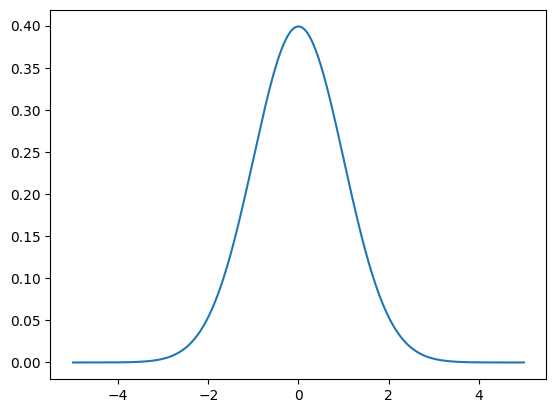

In [33]:
#Distribución normal
mu = 0
sigma = 1
data = np.linspace(-5,5,1000) #1000 puntos de -5 a 5
pdf = norm.pdf(data,mu,sigma)
plt.plot(data,pdf)
plt.show()


In [36]:
mu= df[df["sex"]== "Male"]["height"].mean()
sigma = (df[df["sex"]== "Male"]["height"].std(ddof=1))**2
sigma


np.float64(13.039491979007735)

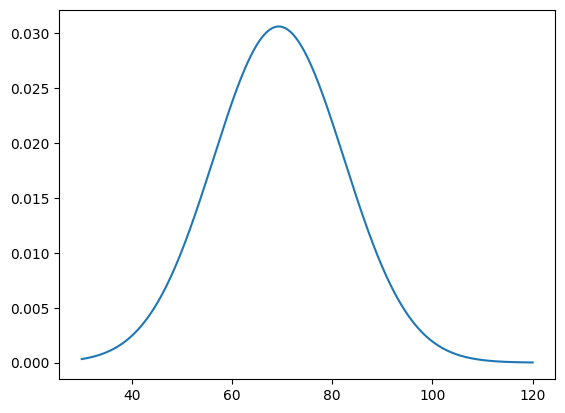

In [39]:
mu= df[df["sex"]== "Male"]["height"].mean()
sigma = (df[df["sex"]== "Male"]["height"].std(ddof=1))**2
data = np.linspace(30,120,1000) #1000 puntos de 40 a 90
pdf = norm.pdf(data,mu,sigma)
plt.plot(data,pdf)
plt.show()